In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import warnings
import random
from matplotlib.ticker import PercentFormatter  


warnings.simplefilter('ignore') # filter some warning messages
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd

def dt64_to_float(dt64):
    """Converts numpy.datetime64 to year as float.

    Rounded to days

    Parameters
    ----------
    dt64 : np.datetime64 or np.ndarray(dtype='datetime64[X]')
        date data

    Returns
    -------
    float or np.ndarray(dtype=float)
        Year in floating point representation
    """

    year = dt64.astype('M8[Y]')
    # print('year:', year)
    days = (dt64 - year).astype('timedelta64[D]')
    # print('days:', days)
    year_next = year + np.timedelta64(1, 'Y')
    # print('year_next:', year_next)
    days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')
                    ).astype('timedelta64[D]')
    # print('days_of_year:', days_of_year)
    dt_float = 1970 + year.astype(float) + days / (days_of_year)
    # print('dt_float:', dt_float)
    return dt_float

if __name__ == "__main__":

    dates = np.array([
        '1970-01-01', '2014-01-01', '2020-12-31', '2019-12-31', '2010-04-28'],
        dtype='datetime64[D]')

    df = pd.DataFrame({
        'date': dates,
        'number': np.arange(5)
        })

    df['date_float'] = dt64_to_float(df['date'].to_numpy())


    dt64 = np.datetime64( "2011-11-11" )
    
#Inladen + sorteren van de dataset op regio
#Geeft het aantal unieke systemen in de verschillende regio's

data = pd.read_excel (r'FulldataEXCEL.xlsx',sheet_name = 'Above40mg')
df = pd.DataFrame(data,columns= ['FECHA DE MUESTREO','SISTEMA DE ABASTECIMIENTO','RESULTADO','PUNTO DE MUESTREO','CANTÓN'])
# display(df)
SortData = df.sort_values(by=['FECHA DE MUESTREO'], ascending=True)
# display(SortData)
#Dit hoeft niet eens, omdat er geen nul waarde in de data set zitten 
Cartago=SortData.dropna(subset=['RESULTADO'])
# display(SortData2)
Cartago.replace('ALVARADO', 'Alvarado', inplace=True)
Cartago.replace('CARTAGO', 'Cartago', inplace=True)
Cartago.replace('OREAMUNO', 'Oreamuno', inplace=True)
Cartago.replace('PARAÍSO', 'Paraíso', inplace=True)

counts = Cartago['CANTÓN'].value_counts()
display(counts)
Cartago_city = Cartago[Cartago["CANTÓN"] == 'Cartago']
Oreamuno = Cartago[Cartago["CANTÓN"] == 'Oreamuno']
Paraíso = Cartago[Cartago["CANTÓN"] == 'Paraíso']
Alvarado = Cartago[Cartago["CANTÓN"] == 'Alvarado']
El_Guarco = Cartago[Cartago["CANTÓN"] == 'El Guarco']

#In de meeste cellen staan dus meerdere waardes, die worden hier gesplits 
#en van elke value wordt een nieuwe rij gemaakt 

def splitDataFrameList(df,target_column,separator,output_type=float):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

Cartago      112
Oreamuno      88
Paraíso       33
Alvarado       8
El Guarco      4
CARTAGO        2
Name: CANTÓN, dtype: int64

In [3]:
#In deze cel worden de volgende handelingen uitgevoerd: Creeëren van een nieuwe
#excel, het sorteren van de dataset op 'Resultaten van hoog --> laag', 
#de datums, resultaten en syteem namen worden geextract


Cartago_city.to_excel('Cartago_city.xlsx')
Cartago_city2 = pd.read_excel (r'Cartago_city.xlsx',index_col=1,parse_dates=True )
Cartago_city3 = pd.DataFrame(Cartago_city2,columns= ['SISTEMA DE ABASTECIMIENTO','RESULTADO','CANTÓN','PUNTO DE MUESTREO'])
# Cartago_city3.sort_values(by=['RESULTADO'],ascending=False, inplace=True)
#Tijd
dates_input = Cartago_city3.index.values.astype('datetime64[D]')
Time = dt64_to_float(dates_input)
Time_rounded = np.round(Time,3)
# #Resultaten
Resultado = Cartago_city3['RESULTADO']
# #Systeem namen, deze zijn echter niet allen uniek --> 

Locaties = Cartago_city3['PUNTO DE MUESTREO']

# #Daarom wordt deze functies gecreert die alleen systemen met een unieke naam 
# #eruit filteren en samenvoegen in een array

Systema = Cartago_city3['SISTEMA DE ABASTECIMIENTO']
print(len(Systema))
def VulFunc(Naam_Array,Naam_Array_leeg):
    k =1
    for j in range(len(Naam_Array_leeg)+1):
        if j+1 == (len(Naam_Array_leeg)+1)and k==1:
            Naam_Array_leeg.append(Naam_Array)

        else:
#             print('door')
            for i in range(len(Naam_Array_leeg)):
                if Naam_Array != Naam_Array_leeg[i]:
                    continue
                else:
                    k = 2 
    return Naam_Array_leeg

# display(Cartago_city3.head(112))

112


In [4]:
#Hier wordt de lege array opgevuld met de unieke systeem namen
display(Cartago_city3)
systema_unique = []
for i in range(len(Cartago_city3['SISTEMA DE ABASTECIMIENTO'])):
    VulFunc(Cartago_city3['SISTEMA DE ABASTECIMIENTO'][i],systema_unique)
print(systema_unique)
print(len(systema_unique))


,SISTEMA DE ABASTECIMIENTO,RESULTADO,CANTÓN,PUNTO DE MUESTREO
FECHA DE MUESTREO,,,,
2008-09-19,BANDERILLA DE SAN NICOLÁS,85.20,Cartago,NACIENTE LA MISIÓN
2009-04-17,BANDERILLA DE SAN NICOLÁS,136.63,Cartago,NACIENTE CALVO 1 (BANDERILLA)
2009-04-17,BANDERILLA DE SAN NICOLÁS,115.37,Cartago,NACIENTE CALVO 2 (BANDERILLA)
2009-10-03,TIERRA BLANCA DE CARTAGO,68.06,Cartago,NACIENTE RODILLAL
2009-10-10,SAN FRANCISCO Y SANTA EDUVIGES DE TIERRA BLANCA,71.66,Cartago,NACIENTE LA ORTIGA 1
...,...,...,...,...
2021-09-15,SAN BLAS DEL CARMEN DE CARTAGO: SECTOR NORTE O...,46.52,Cartago,RED 2
2021-09-16,SAN BLAS DE EL CARMEN DE CARTAGO: CENTRO,41.00,Cartago,NACIENTE LANKASTER
2021-09-16,SAN BLAS DE EL CARMEN DE CARTAGO: CENTRO,41.01,Cartago,RED 2


['BANDERILLA DE SAN NICOLÁS', 'TIERRA BLANCA DE CARTAGO', 'SAN FRANCISCO Y SANTA EDUVIGES DE TIERRA BLANCA', 'CIUDADELA GRACIANO Y LA TRINIDAD DE TIERRA BLANCA', 'LA MISIÓN DE TIERRA BLANCA', 'RESIDENCIAL EL MOLINO DE CARTAGO', 'TIERRA BLANCA DE CARTAGO: SECTOR CIUDADELA LA MISIÓN', 'TIERRA BLANCA: SAN FRANCISCO Y SANTA EDUVIGES', 'CERROS DE SAN NICOLAS', 'SAN BLAS DE EL CARMEN DE CARTAGO: SECTOR NORTE', 'TIERRA BLANCA DE CARTAGO: SECTOR LA MISION', 'TIERRA BLANCA: CIUDADELA GRACIANO Y LA TRINIDAD', 'LLANO GRANDE DE CARTAGO: SECTOR FUENTES SAN LUIS', 'TIERRA BLANCA DE CARTAGO: SECTOR LA MISIÓN', 'BANDERILLA DE SAN NICOLAS', 'SAN BLAS DE EL CARMEN DE CARTAGO SECTOR NORTE', 'SAN BLAS DE EL CARMEN DE CARTAGO CENTRO', 'EL CARMEN DE CARTAGO SECTOR CENTRO Y SUR', 'TEJAR: SECTOR POZO LA ROSITA', 'RESIDENCIAL EL MOLINO (CARTAGO)', 'TIERRA BLANCA: LA MISIÓN', 'EL CARMEN DE CARTAGO: SECTORES CENTRO Y SUR', 'SAN BLAS DE EL CARMEN DE CARTAGO: CENTRO', 'SAN BLAS DEL CARMEN DE CARTAGO: SECTOR NORTE 

In [5]:
#in deze functie worden de drie elementen gecombineerd: Tijd, Resultaen en 
#systemen. Aleen de systemen waarbij de waarde boven de 50 uitkomt zal worden
#geplot. De output is een grafiek met twee threshold values + dataplotten over
#tijd en de hoeveelheid data punten aangegeven door de individuele 
#markeerpunten. Daarnaast worden de probleem gevallen nitraat hoeveelheden > 50, 
#opgeslagen in de array: 'Problems'
def Sub_systemen(nummer):
    SAN_RAFAEL_DE_OREAMUNO_CENTRO = np.zeros(251)
    SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME = np.zeros(251)
#     SAN_RAFAEL_DE_OREAMUNO_CENTRO_lOCATION = np.zeros(251)
    for i in range(112):
        if Systema[i]== systema_unique[nummer]:
                SAN_RAFAEL_DE_OREAMUNO_CENTRO[i] = Resultado[i]
                SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME[i] = Time_rounded[i]
#                 SAN_RAFAEL_DE_OREAMUNO_lOCATION[i] = Locaties[i]
    #             print('ja') 

    a = SAN_RAFAEL_DE_OREAMUNO_CENTRO
    a0 = a[a != 0]
    b = SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME
    b0 = b[b != 0]
#     c = SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION
#     c0 = c[c != 0]
    
    
    m = 1 
    for i in range(len(a0)):
        if a0[i] > 40:
            plt.title(f'{systema_unique[nummer]}', color = 'red')
#             Problems.append(f'{systema_unique[nummer]}')
            plt.ylabel('Nitrate in mg/l')
#             axs[i,j].plot(b0,a0,marker='o', markerfacecolor='blue', markersize=12)
            plt.plot(b0,a0,marker='o', markerfacecolor='blue', markersize=12)
            plt.axhline(40, color = 'yellow')
            plt.axhline(50, color = 'red')
            plt.xticks(rotation=90)
            plt.xlim([2009, 2022])
            plt.title(f'{systema_unique[nummer]}',fontsize = 13)
            m = 2 
            break
    return  plt.plot(b0,a0,marker='o', markerfacecolor='blue', markersize=12);
#, a0, b0, Problems

In [6]:
#Deze functie wordt gebruikt om onderscheidt te maken tussen de subplots die 
#wel >50 en niet <50 geplot moeten worden, door een m = 1 of m = 2 toe te wijzen. 
def Sub_systemen_m(nummer):
    SAN_RAFAEL_DE_OREAMUNO_CENTRO = np.zeros(251)
    SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME = np.zeros(251)
#     SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION = np.zeros(251)
    for i in range(112):
        if Systema[i]== systema_unique[nummer]:
                SAN_RAFAEL_DE_OREAMUNO_CENTRO[i] = Resultado[i]
                SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME[i] = Time_rounded[i]
#                 SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION[i] = Locaties[i]
    #             print('ja') 

    a = SAN_RAFAEL_DE_OREAMUNO_CENTRO
    a0 = a[a != 0]
    b = SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME
    b0 = b[b != 0]
#     c = SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION
#     c0 = c[c != 0]
    
    m = 1 
    for i in range(len(a0)):
        if a0[i] > 40:
            m = 2 
            break
    return  m



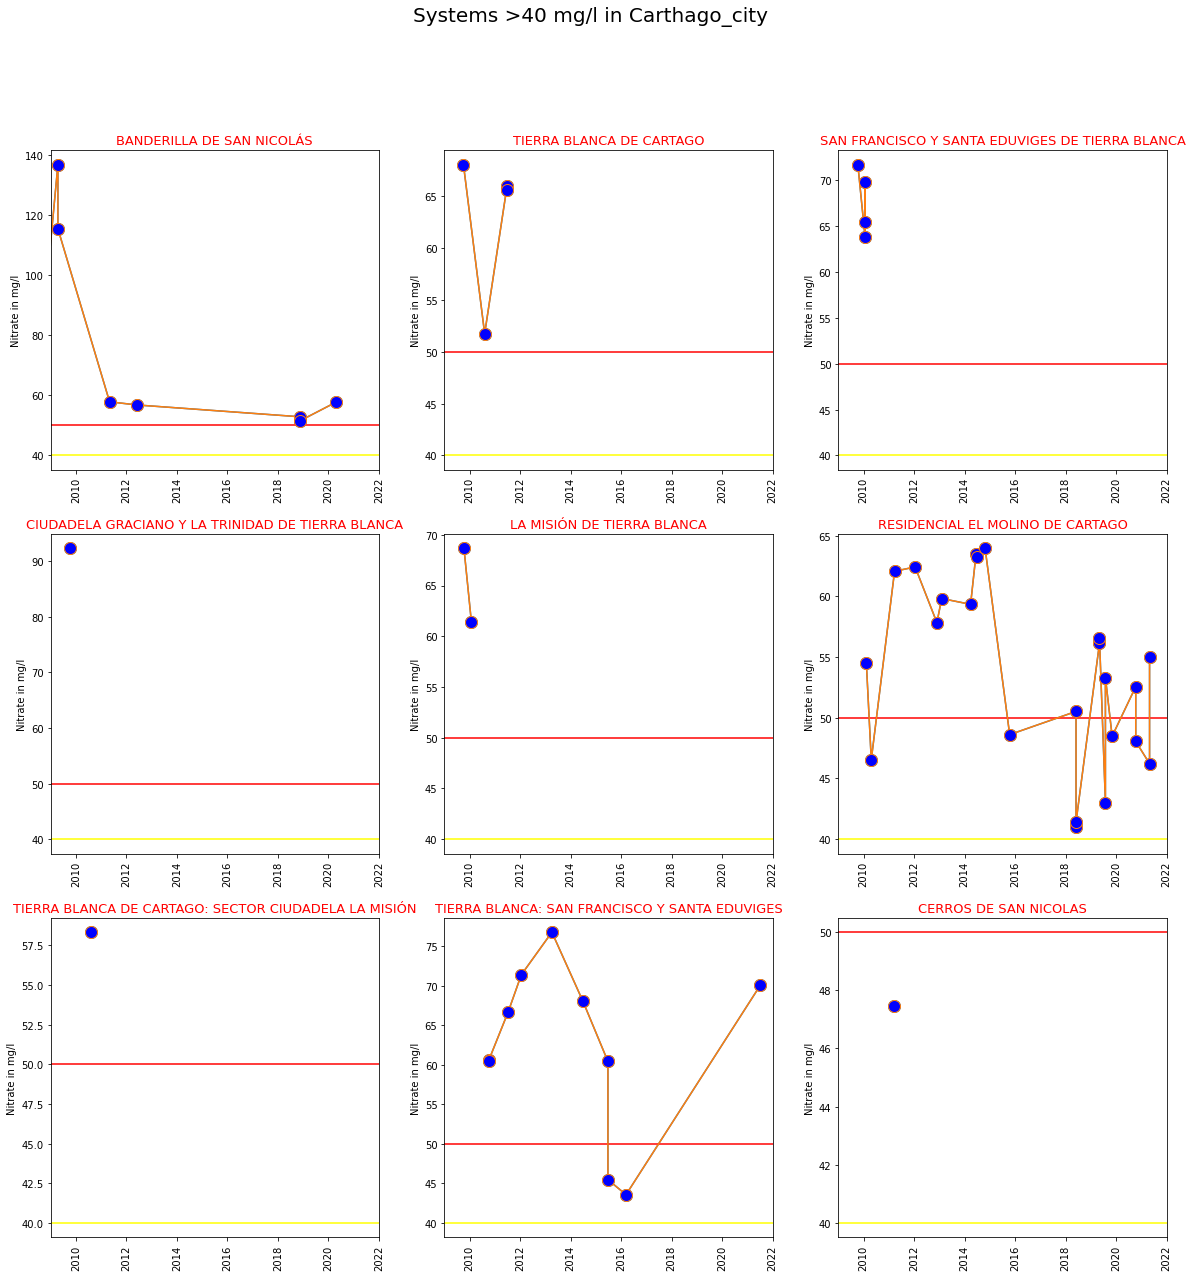

In [7]:
fig = plt.figure(figsize=(20,20));
for i in range(9):
    if Sub_systemen_m(i) == 2:
        plt.subplot(3,3,i+1);
#         #Sub_systemen(i);
        print(Sub_systemen(i))
# print(Problems)  
fig.suptitle('Systems >40 mg/l in Carthago_city',fontsize = 20 ) 
fig.savefig('First_9_Cartago_City_timeline_from40mg')

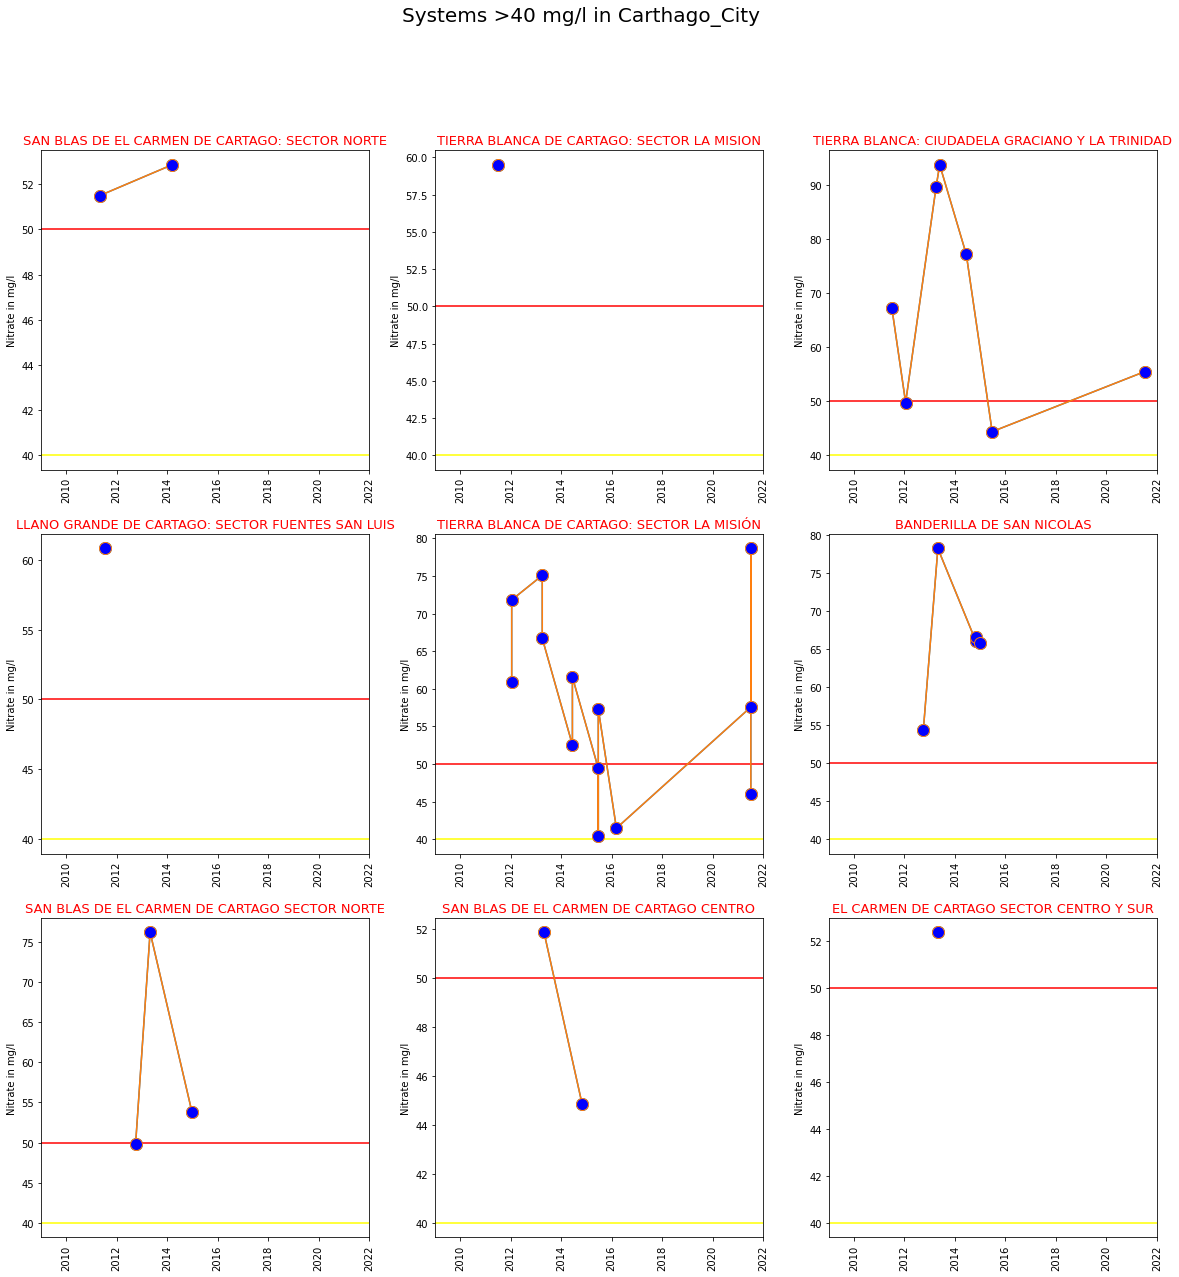

In [8]:
fig = plt.figure(figsize=(20,20));
for i in range(9):
    if Sub_systemen_m(i+9) == 2:
        plt.subplot(3,3,i+1);
#         #Sub_systemen(i);
        print(Sub_systemen(i+9))
# print(Problems)  
fig.suptitle('Systems >40 mg/l in Carthago_City',fontsize = 20 ) 
fig.savefig('Second_9_Cartago_City_timeline_from40mg')

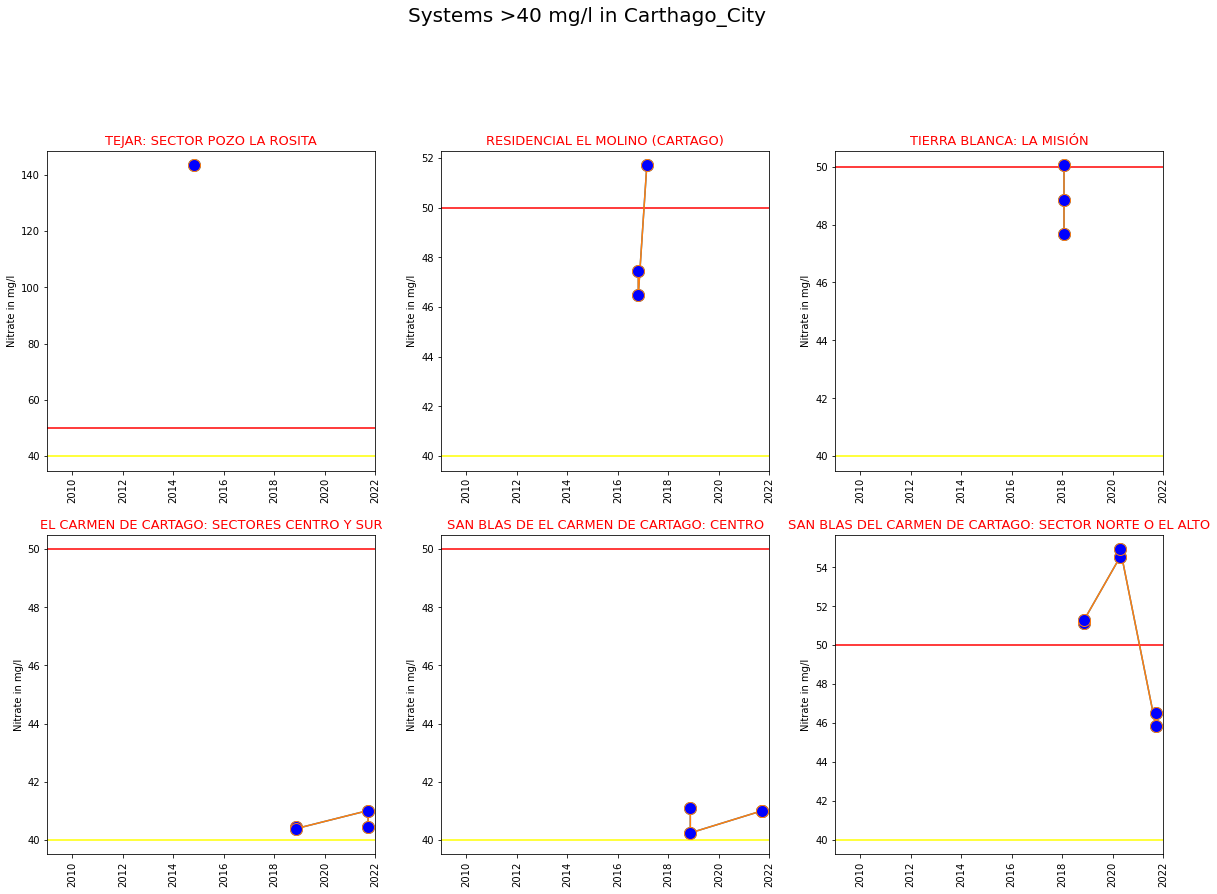

In [9]:
fig = plt.figure(figsize=(20,20));
for i in range(6):
    if Sub_systemen_m(i+18) == 2:
        plt.subplot(3,3,i+1);
#         #Sub_systemen(i);
        print(Sub_systemen(i+18))
# print(Problems)  
fig.suptitle('Systems >40 mg/l in Carthago_City',fontsize = 20 ) 
fig.savefig('Third_9_Cartago_City_timeline_from40mg')

In [10]:
display(Resultado)

FECHA DE MUESTREO
2008-09-19     85.20
2009-04-17    136.63
2009-04-17    115.37
2009-10-03     68.06
2009-10-10     71.66
               ...  
2021-09-15     46.52
2021-09-16     41.00
2021-09-16     41.01
2021-09-17     41.01
2021-09-17     40.43
Name: RESULTADO, Length: 112, dtype: float64

In [11]:
import pandas as pd
# interval = pd.Interval(pd.Timestamp('2020-01-01 00:00:00'), pd.Timestamp('2021-01-01 00:00:00'), closed='left')
# print(interval)
Resultado = Cartago_city3['RESULTADO']
# display(Cartago_city3)
Resultado.index

Year2008 = Resultado.loc['2008-01-01':'2009-01-01']
Year2009 = Resultado.loc['2009-01-01':'2010-01-01']
Year2010 = Resultado.loc['2010-01-01':'2011-01-01']
Year2011 = Resultado.loc['2011-01-01':'2012-01-01']
Year2012 = Resultado.loc['2012-01-01':'2013-01-01']
Year2013 = Resultado.loc['2013-01-01':'2014-01-01']
Year2014 = Resultado.loc['2014-01-01':'2015-01-01']
Year2015 = Resultado.loc['2015-01-01':'2016-01-01']
Year2016 = Resultado.loc['2016-01-01':'2017-01-01']
Year2017 = Resultado.loc['2017-01-01':'2018-01-01']
Year2018 = Resultado.loc['2018-01-01':'2019-01-01']
Year2019 = Resultado.loc['2019-01-01':'2020-01-01']
Year2020 = Resultado.loc['2020-01-01':'2021-01-01']
Year2021 = Resultado.loc['2021-01-01':'2022-01-01']

Years = [Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,Year2018,Year2019,Year2020,Year2021]

# Year2010.countplot()
display(Years[5])


FECHA DE MUESTREO
2014-03-14     52.86
2014-03-29     59.34
2014-06-14     77.18
2014-06-14     52.54
2014-06-14     61.56
2014-06-16     63.51
2014-06-28     68.02
2014-07-04     63.21
2014-10-25     63.94
2014-10-27     66.12
2014-10-27     66.57
2014-10-31     44.87
2014-10-31    143.26
2014-12-26     53.76
2014-12-26     65.77
Name: RESULTADO, dtype: float64

In [12]:
def IndepthAnalysisHist(year):
    box40 = []
    box50 = []
    box60 = []
    box70 = []
    box80 = []
    box90 = []
    box100 = []
    for i in range(len(year)):
        if year[i]>30 and year[i]<40:
            box40.append(year[i])
    for i in range(len(year)):
        if year[i]>40 and year[i]<50:
            box50.append(year[i])
    for i in range(len(year)):
        if year[i]>50 and year[i]<60:
            box60.append(year[i])
    for i in range(len(year)):
        if Year2010[i]>60 and year[i]<70:
            box70.append(year[i])
    for i in range(len(year)):
        if year[i]>70 and year[i]<80:
            box80.append(year[i])
    for i in range(len(year)):
        if year[i]>90 and year[i]<100:
            box90.append(year[i])
    for i in range(len(year)):
            box100.append(year[i])

    totBox = box40 + box50 + box60 + box70 + box80 + box90 + box100
    totLen = len(box40) + len(box50) + len(box60) + len(box70) + len(box80) + len(box90) + len(box100)
    Percentage = [len(box40)/totLen,len(box50)/totLen,len(box60)/totLen,len(box70)/totLen,len(box80)/totLen,len(box90)/totLen,len(box100)/totLen]
    df = pd.DataFrame(totBox)
    plt.hist(totBox, weights=np.ones(len(totBox))/len(totBox),bins=[30,40,50,60,70,80,90,100], color='gray', stacked=True)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylabel('%TOT')
    plt.xlabel('mg/L Nitrate')

    return 

None


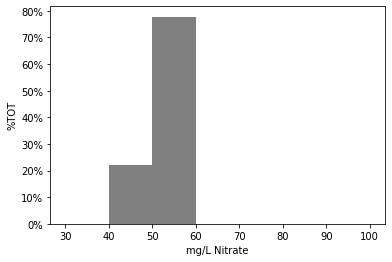

In [13]:
print(IndepthAnalysisHist(Year2020))


In [14]:
def IndepthAnalysisBoxplot(year):
    box40 = []
    box50 = []
    box60 = []
    box70 = []
    box80 = []
    box90 = []
    box100 = []
    for i in range(len(year)):
        if year[i]>30 and year[i]<40:
            box40.append(year[i])
    for i in range(len(year)):
        if year[i]>40 and year[i]<50:
            box50.append(year[i])
    for i in range(len(year)):
        if year[i]>50 and year[i]<60:
            box60.append(year[i])
    for i in range(len(year)):
        if Year2010[i]>60 and year[i]<70:
            box70.append(year[i])
    for i in range(len(year)):
        if year[i]>70 and year[i]<80:
            box80.append(year[i])
    for i in range(len(year)):
        if year[i]>90 and year[i]<100:
            box90.append(year[i])
    for i in range(len(year)):
        if year[i]>100:
            box100.append(year[i])

    totBox = box40 + box50 + box60 + box70 + box80 + box90 + box100
    totLen = len(box40) + len(box50) + len(box60) + len(box70) + len(box80) + len(box90) + len(box100)
    Percentage = [len(box40)/totLen,len(box50)/totLen,len(box60)/totLen,len(box70)/totLen,len(box80)/totLen,len(box90)/totLen,len(box100)/totLen]
    data = pd.DataFrame(totBox)
    plt.boxplot(data[0])
    plt.ylabel('mg/l Nitrate')
    return 


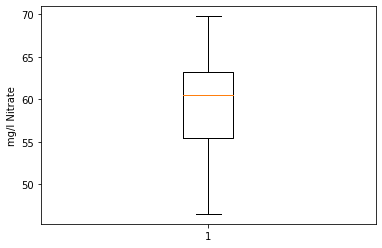

In [15]:
IndepthAnalysisBoxplot(Year2010);

In [16]:
def Data(year):
    box40 = []
    box50 = []
    box60 = []
    box70 = []
    box80 = []
    box90 = []
    box100 = []
    for i in range(len(year)):
        if year[i]>30 and year[i]<40:
            box40.append(year[i])
    for i in range(len(year)):
        if year[i]>40 and year[i]<50:
            box50.append(year[i])
    for i in range(len(year)):
        if year[i]>50 and year[i]<60:
            box60.append(year[i])
    for i in range(len(year)):
        if year[i]>60 and year[i]<70:
            box70.append(year[i])
    for i in range(len(year)):
        if year[i]>70 and year[i]<80:
            box80.append(year[i])
    for i in range(len(year)):
        if year[i]>90 and year[i]<100:
            box90.append(year[i])
    for i in range(len(year)):
        if year[i]>100:
            box100.append(year[i])

    totBox = box40 + box50 + box60 + box70 + box80 + box90 + box100
    totLen = len(box40) + len(box50) + len(box60) + len(box70) + len(box80) + len(box90) + len(box100)
    Percentage = [len(box40)/totLen,len(box50)/totLen,len(box60)/totLen,len(box70)/totLen,len(box80)/totLen,len(box90)/totLen,len(box100)/totLen]
    data = pd.DataFrame(totBox)

    return data.mean()

print(Data(Year2014))

0    66.834
dtype: float64


   Years      Means
0   2009  92.115000
1   2010  59.264000
2   2011  60.480000
3   2012  59.465556
4   2013  70.096667
5   2014  66.834000
6   2015  49.431429
7   2016  44.747500
8   2018  46.315714
9   2019  51.498000
10  2020  52.252857
11  2021  51.143846


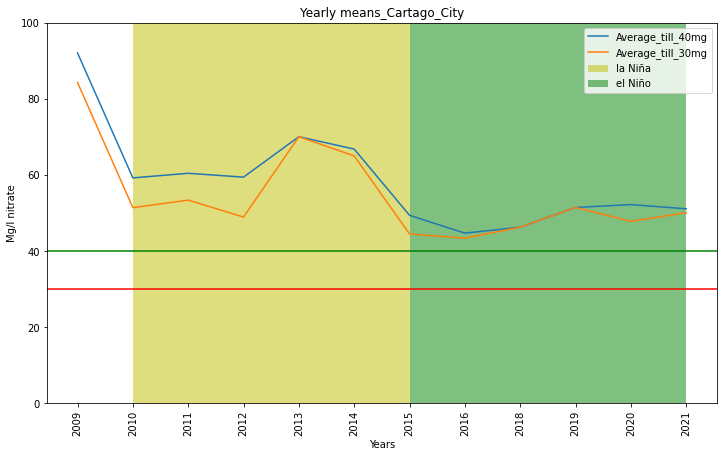

In [28]:
YearsNames = ['2009','2010','2011','2012','2013','2014','2015','2016','2018','2019','2020','2021']
Years = [Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,Year2018,Year2019,Year2020,Year2021]
YearsINCLUDING2013 = ['2009','2010','2011','2012','2013','2014','2015','2016','2018','2019','2020','2021']
MeansINCLUDING2013 = [84.358571,51.454000,53.420714,48.982667,70.096667,65.053750,44.530000,43.424000,46.315714,51.498000,47.853333,50.125714]

Means = []
for i in range(12):
    Means.append(Data(Years[i])[0])
plt.figure(figsize=(12,7))

data = {'Years':YearsNames, 'Means':Means}
MeansData = pd.DataFrame(data)
print(MeansData)

fig = plt.plot(MeansData['Years'],MeansData['Means'],label='Average_till_40mg')
fig = plt.plot(YearsINCLUDING2013,MeansINCLUDING2013,label='Average_till_30mg')

plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Mg/l nitrate')

plt.axvspan(1, 6, facecolor='y', alpha=0.5, label = 'la Niña')
plt.axvspan(6, 11, facecolor='g', alpha=0.5, label = 'el Niño')
plt.legend()
plt.ylim(0,100)
plt.axhline(40, color = 'green')
plt.axhline(30, color = 'red')

plt.title('Yearly means_Cartago_City')
plt.savefig('Yearly means_Cartago_city_Combined')